 Data cleaning and modelling

• Provide an environment (Database if possible) to connect Tableau to

• Answer the following questions

• What Categories/Subcategories are projected to grow the fastest in the next 5 years?

• Within these Categories/Subcategories, what Channels are growing?

• What is Dragonyte’s market position within these fast-growing categories?

• Provide predictions + explanation of the model used

• Give your recommendations to the Dragonyte Board

• Think out of the box! Dare to surprise!

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import sklearn
from sklearn.feature_selection import RFE


In [37]:
pd.set_option("display.max_row", 500)
pd.set_option("display.max_columns", 150)

pd.set_option('display.max_colwidth', None)

pd.set_option('display.precision', 2)

pd.set_option('display.float_format', '{:.2f}'.format)


In [38]:
#Market size TAM SAM
df = pd.read_csv('Data/Market_Sizes.csv')

In [39]:
subcategories = pd.read_csv('Data/Subcategories.csv')

In [40]:
df.head()

,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [41]:
df['Subcategory'].unique

<bound method Series.unique of 0        1
1        1
2        1
3        1
4        1
        ..
1216    17
1217    17
1218    17
1219    17
1220    17
Name: Subcategory, Length: 1221, dtype: int64>

In [42]:
df = pd.merge(subcategories, df, left_on='id', right_on='Subcategory', suffixes=('SUBC', '_DF'))


In [43]:
df['Category'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1216    5
1217    5
1218    5
1219    5
1220    5
Name: Category, Length: 1221, dtype: int64>

In [44]:
df.shape

(1221, 18)

In [45]:
df.isnull().sum()

id                     0
Category               0
Name                   0
Location               0
Industry               0
Subcategory            0
Hierarchy_Level        0
Data_Type              0
Unit                   0
Current_Constant       0
Currency_Conversion    0
Year                   0
Year_date              0
RSP                    0
Volume                 0
Year_minus_2016        0
Year_minus_2022        0
Edition                0
dtype: int64

In [46]:
print(df.dtypes)


id                       int64
Category                 int64
Name                    object
Location                 int64
Industry                object
Subcategory              int64
Hierarchy_Level          int64
Data_Type               object
Unit                    object
Current_Constant        object
Currency_Conversion     object
Year                     int64
Year_date               object
RSP                    float64
Volume                 float64
Year_minus_2016          int64
Year_minus_2022          int64
Edition                  int64
dtype: object


In [47]:
df['Unit'].unique()


array(['USD million'], dtype=object)

In [48]:
df.drop_duplicates(inplace=True)


In [49]:
df['Data_Type'].unique

<bound method Series.unique of 0       Total Value RSP
1       Total Value RSP
2       Total Value RSP
3       Total Value RSP
4       Total Value RSP
             ...       
1216    Total Value RSP
1217    Total Value RSP
1218    Total Value RSP
1219    Total Value RSP
1220    Total Value RSP
Name: Data_Type, Length: 1221, dtype: object>

In [50]:
df.head()

,id,Category,Name,Location,Industry,Subcategory,Hierarchy_Level,Data_Type,Unit,Current_Constant,Currency_Conversion,Year,Year_date,RSP,Volume,Year_minus_2016,Year_minus_2022,Edition
0,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2016,31-Dec-16,301.00,27.00,4,-2,2022
1,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2017,31-Dec-17,318.00,28.00,5,-1,2022
2,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2018,31-Dec-18,458.00,40.00,6,0,2022
3,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2019,31-Dec-19,612.00,51.00,7,1,2022
4,1,1,Ale,1,Alcoholic Drinks,1,3,Total Value RSP,USD million,"Historic Constant 2021 Prices, Forecast Constant 2021 Prices","Historic Fixed 2021 Exchange Rates, Forecast Fixed 2021 Exchange Rates",2020,31-Dec-20,774.00,62.00,8,2,2022


In [51]:
df = df.drop(['Year_minus_2022','Year_minus_2016','Edition','Current_Constant','Currency_Conversion','Unit','Data_Type','Year_date'], axis=1)

In [52]:
numerical=df.select_dtypes(include=np.number)
numerical.shape

(1221, 8)

In [53]:
categorical = df.select_dtypes(include=['object', 'category'])
categorical.shape

(1221, 2)

In [54]:
df.columns

Index(['id', 'Category', 'Name', 'Location', 'Industry', 'Subcategory',
       'Hierarchy_Level', 'Year', 'RSP', 'Volume'],
      dtype='object')

<Axes: >

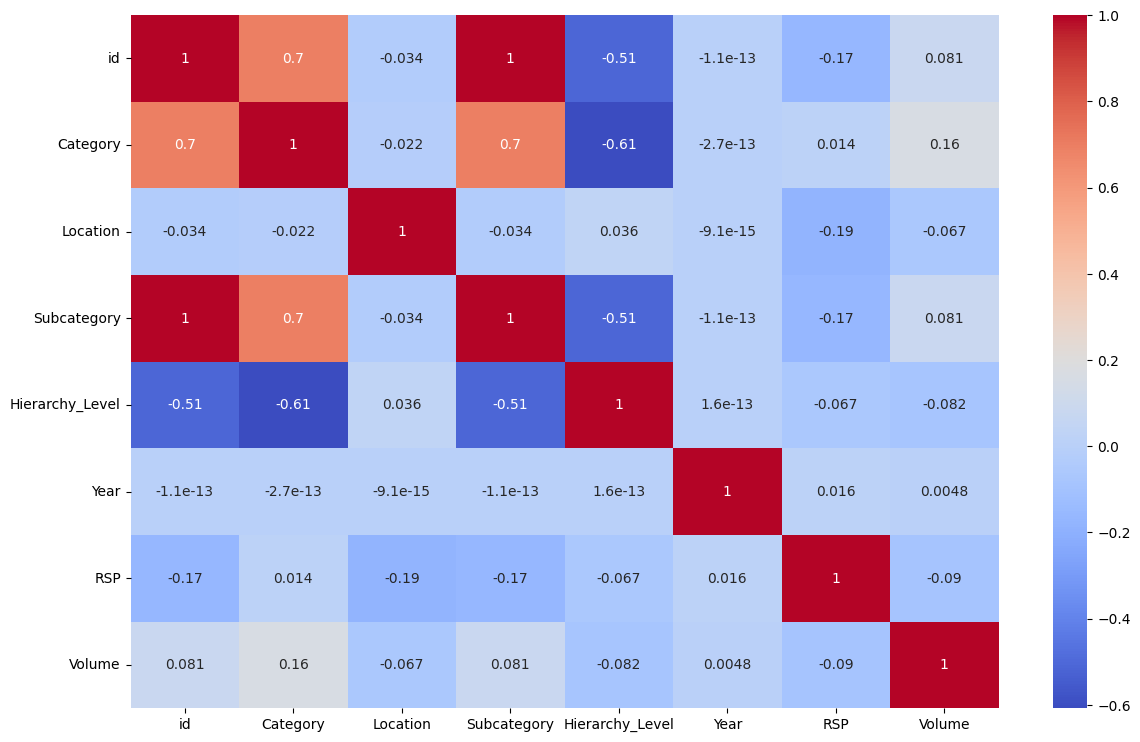

In [55]:
corr = numerical.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [56]:
df.columns

Index(['id', 'Category', 'Name', 'Location', 'Industry', 'Subcategory',
       'Hierarchy_Level', 'Year', 'RSP', 'Volume'],
      dtype='object')

In [57]:
df.head()

,id,Category,Name,Location,Industry,Subcategory,Hierarchy_Level,Year,RSP,Volume
0,1,1,Ale,1,Alcoholic Drinks,1,3,2016,301.00,27.00
1,1,1,Ale,1,Alcoholic Drinks,1,3,2017,318.00,28.00
2,1,1,Ale,1,Alcoholic Drinks,1,3,2018,458.00,40.00
3,1,1,Ale,1,Alcoholic Drinks,1,3,2019,612.00,51.00
4,1,1,Ale,1,Alcoholic Drinks,1,3,2020,774.00,62.00


In [58]:
X = numerical.drop("Subcategory",axis=1)   #Feature Matrix
y = numerical["Subcategory"] 

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((854, 7), (367, 7))

ExtraTreesRegressor

In [60]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)


[6.59682308e-01 8.53319599e-02 0.00000000e+00 2.54979244e-01
 0.00000000e+00 3.24377129e-06 3.24377129e-06]


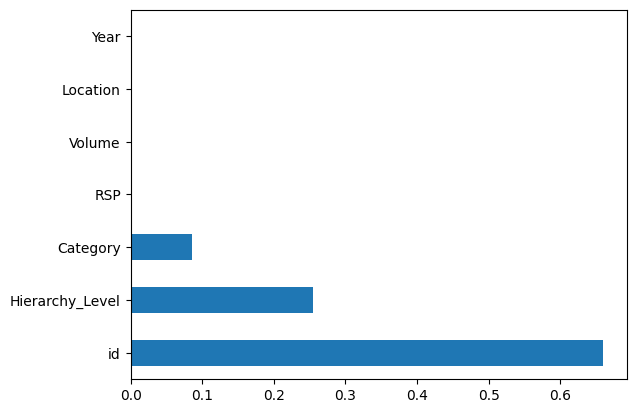

In [62]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [63]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [64]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[var_thres.get_support()]]

print(len(constant_columns))

0


Mutual_info_Regression

In [65]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([2.79178928, 0.83825462, 0.00390518, 1.40633839, 0.        ,
       1.024786  , 1.17564255])

In [66]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

id                2.79
Hierarchy_Level   1.41
Volume            1.18
RSP               1.02
Category          0.84
Location          0.00
Year              0.00
dtype: float64

<Axes: >

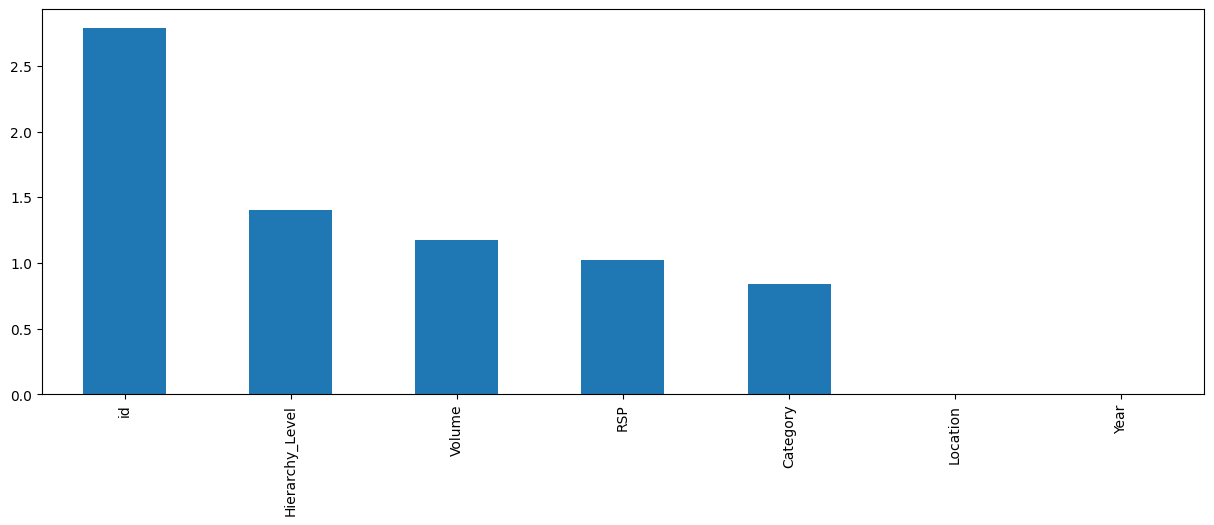

In [67]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [68]:
from sklearn.feature_selection import SelectPercentile


## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x15ac836a0>)

In [69]:
selected_top_columns.get_support()
X_train.columns[selected_top_columns.get_support()]


Index(['id', 'Hierarchy_Level'], dtype='object')

<Axes: xlabel='Volume', ylabel='RSP'>

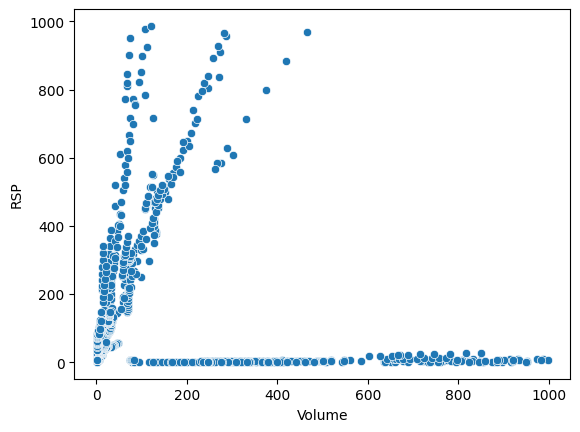

In [71]:
sns.scatterplot(df, y = "RSP", x = "Volume")

<Axes: xlabel='Year', ylabel='RSP'>

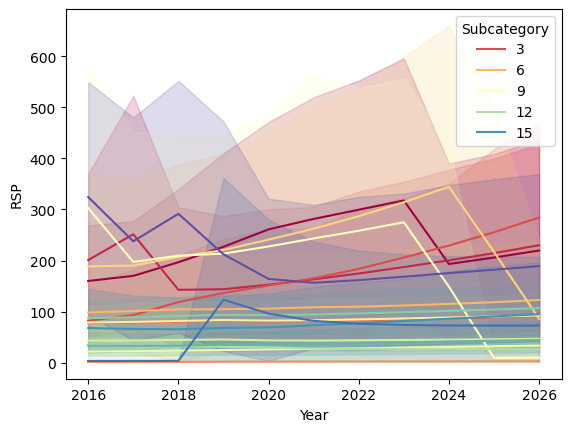

In [74]:

sns.lineplot(df, x = "Year", y = "RSP", hue = 'Subcategory',  palette="Spectral")